In [1]:
#!pip install simple_fpa

In [2]:
# %%capture out
# ! cd ..; pip install . --use-feature=in-tree-build

In [3]:
%%capture out
! cd ..; pip install .

In [4]:
print((out.stdout.split('\n')[-2]))

In [5]:
from simple_fpa import Model
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Arial"],
    "lines.linewidth": 1
})

rcParams['figure.dpi'] = 200

In [6]:
df = pd.read_csv('../_data/haile_data_prepared.csv', index_col=0)

In [7]:
# pick a smaller subset of auctions
df = df[df.auctionid.isin(list(set(df.auctionid.values))[:500])].copy()

In [8]:
model = Model(data = df, auctionid_columns = ['auctionid'], bid_column = 'actual_bid')
cont_covs = ['adv_value', 'hhi', 'volume_total_1']
disc_covs = ['year', 'forest']
model.residualize(cont_covs, disc_covs, 'multiplicative')

In [9]:
model.summary()

                            OLS Regression Results                            
Dep. Variable:     np.log(actual_bid)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     920.2
Date:                Wed, 18 May 2022   Prob (F-statistic):               0.00
Time:                        13:12:49   Log-Likelihood:                -1293.6
No. Observations:                1954   AIC:                             2629.
Df Residuals:                    1933   BIC:                             2746.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3

In [10]:
# we can simulate artificial data, of course
# model.data._resid = np.sort(np.random.uniform(0,1,size = len(model.data)))

In [11]:
model.trim_residuals(10)
model.fit(smoothing_rate = 0.2, trim_percent = 15, reflect = True)
model.predict()

In [12]:
model.make_ci(99, hyp = 'twosided')

In [13]:
model.make_cb(99, draws = 1000, hyp = 'twosided')

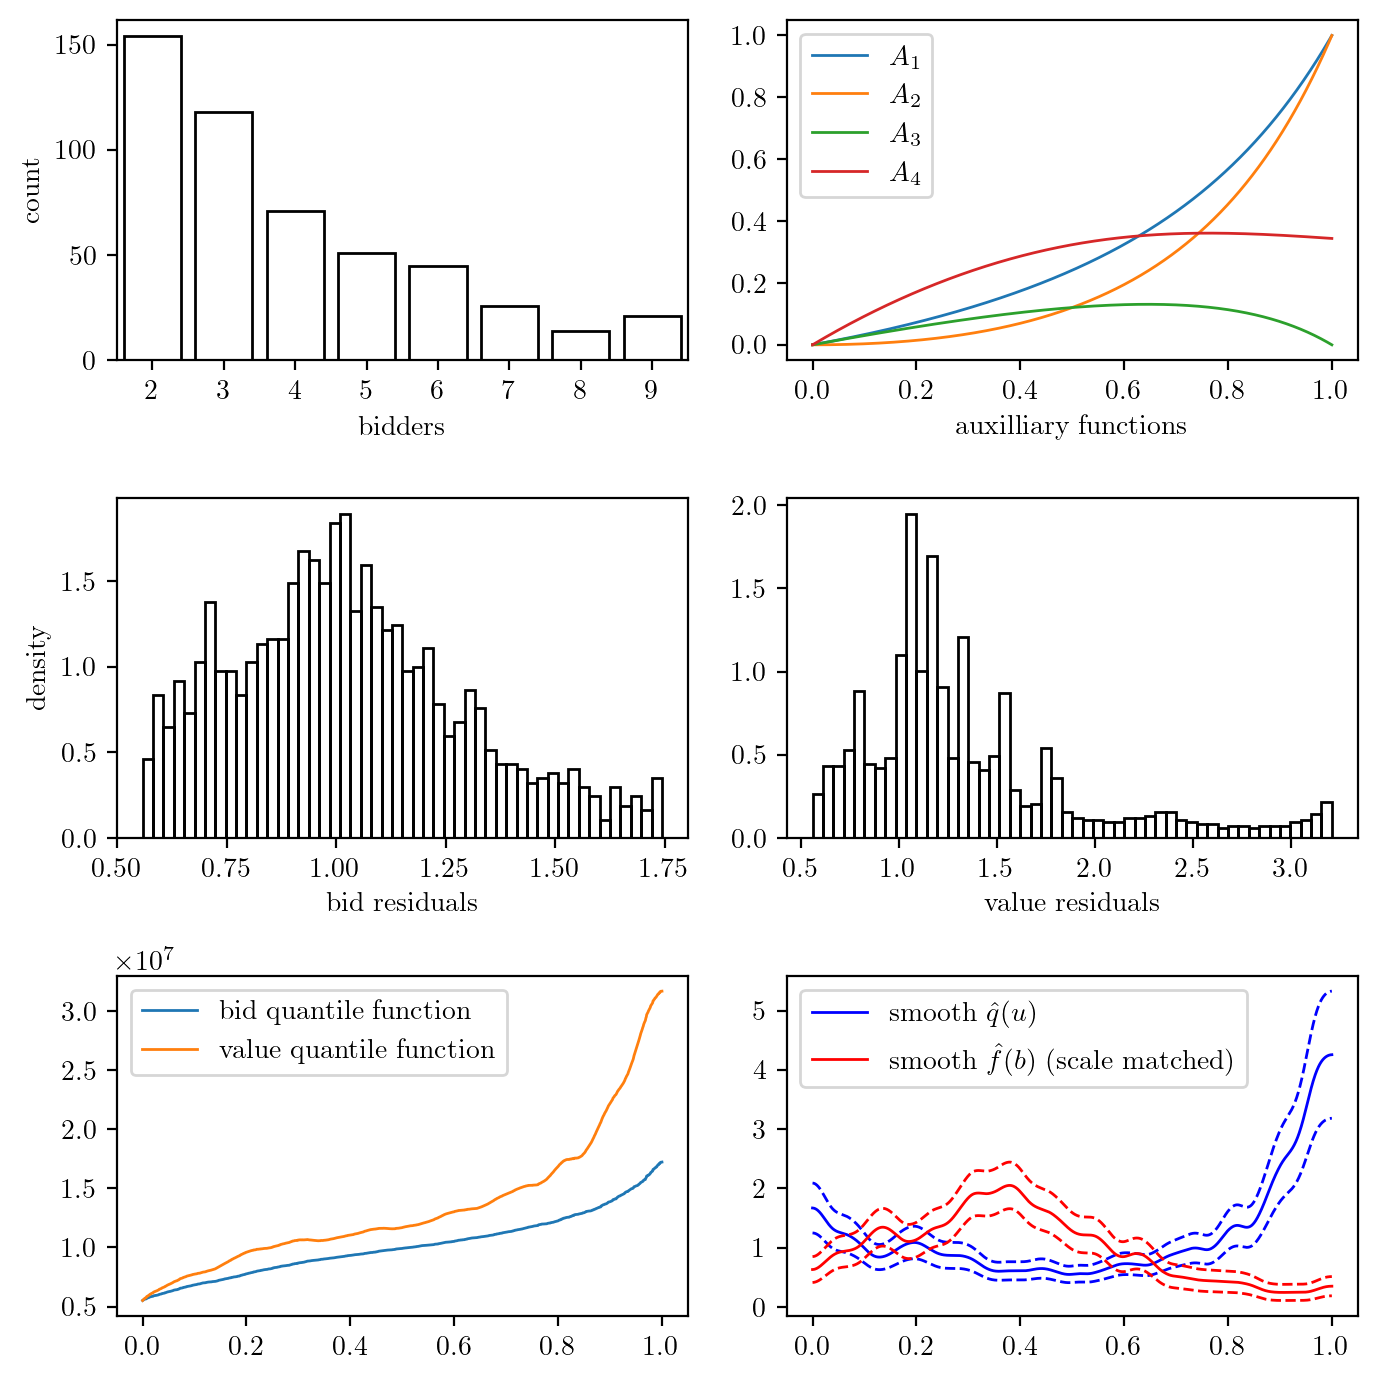

In [14]:
model.plot_stats()

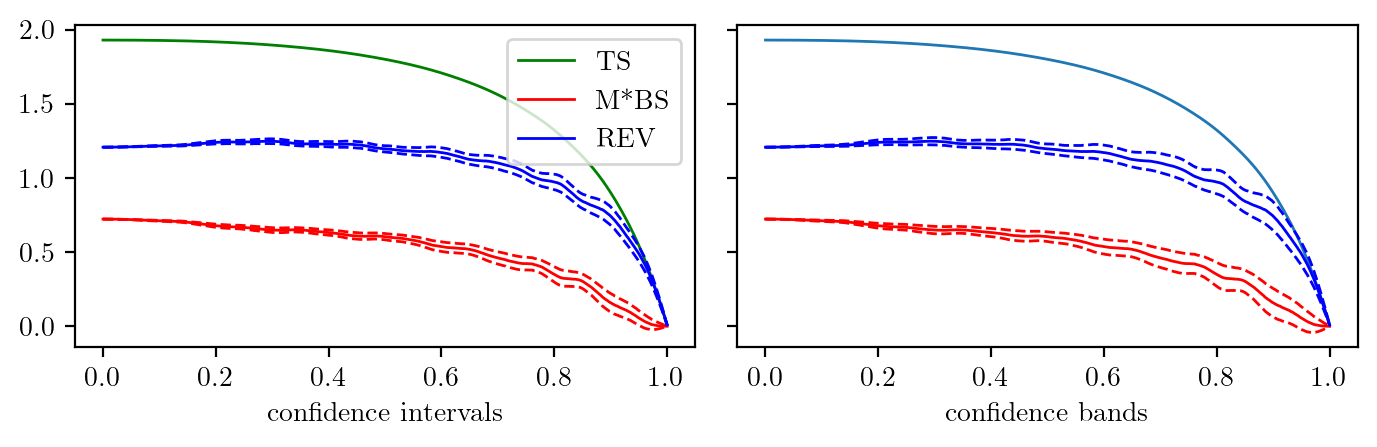

In [15]:
model.plot_counterfactuals()

In [16]:
model.data.sample(5)

,auctionid,hhi,forest,adv_value,year,state,volume_total_1,actual_bid,_bidders,_resid,...,_hat_rev,_latent_actual_bid,_q_ci,_v_ci,_bs_ci,_rev_ci,_q_cb,_v_cb,_bs_cb,_rev_cb
55842,350,0.603957,5,34084279.0,82,12,1486.0,36202383.0,6,1.086294,...,1.148684,4.460829e+07,0.180768,0.063558,0.003608,0.032474,0.279498,0.098271,0.005579,0.050210
33109,239,0.889273,18,480995.0,82,41,85.0,560995.0,8,0.853536,...,1.244986,6.852590e+05,0.219220,0.047641,0.001567,0.014101,0.338951,0.073661,0.002423,0.021803
16908,439,0.584400,7,6201745.0,82,28,455.0,7136270.0,3,0.957192,...,1.225854,8.528213e+06,0.158762,0.047046,0.002219,0.019975,0.245473,0.072741,0.003432,0.030884
16732,263,0.551079,1,12368772.0,82,1,834.0,14207336.0,5,1.067367,...,1.169594,1.759196e+07,0.184151,0.064075,0.003615,0.032535,0.284729,0.099070,0.005589,0.050305
309,309,0.542732,3,18546427.0,82,13,1527.0,20943835.0,2,1.133529,...,1.110043,2.671076e+07,0.219456,0.078649,0.004435,0.039917,0.339317,0.121605,0.006858,0.061718
